In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

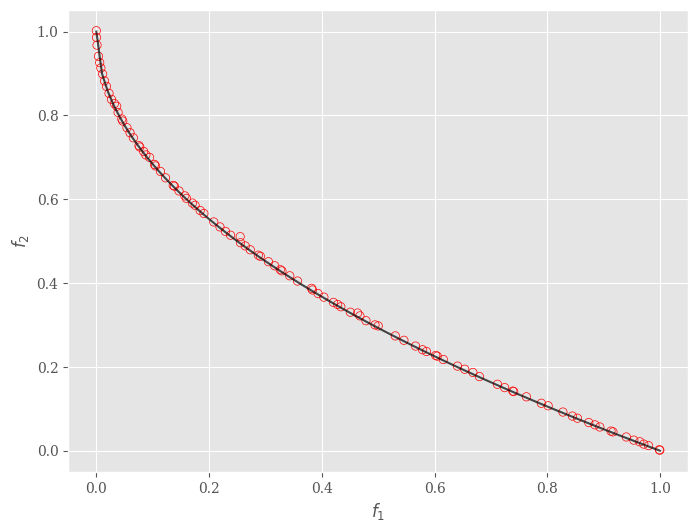

In [2]:
problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()


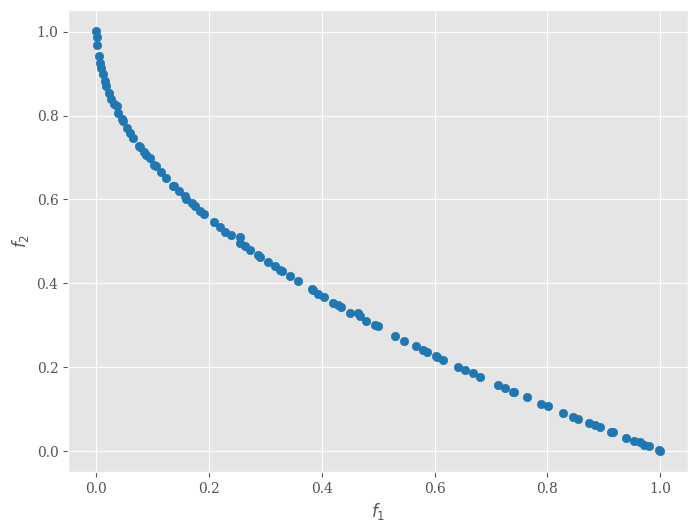

In [5]:

Scatter().add(res.F).show()


In [15]:
import numpy as np
from pymoo.core.problem import Problem
import math
class MyProblem(Problem):
    def __init__(self):
        super().__init__(n_var=1,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([-2]),
                         xu=np.array([2]),
                        )
    def _evaluate(self, X, out, *args, **kwargs):
        f1 = X[:,0]**2
        f2 = (X[:,0]-2)**2
        # g1 = (X[:, 0]-0.1) / 0.1
        # g2 = - 20*(X[:, 0]-0.4) * (X[:, 0]-0.6) / 4.8
        out["F"] = np.column_stack([f1, f2])
        # out["G"] = np.column_stack([g1, g2])

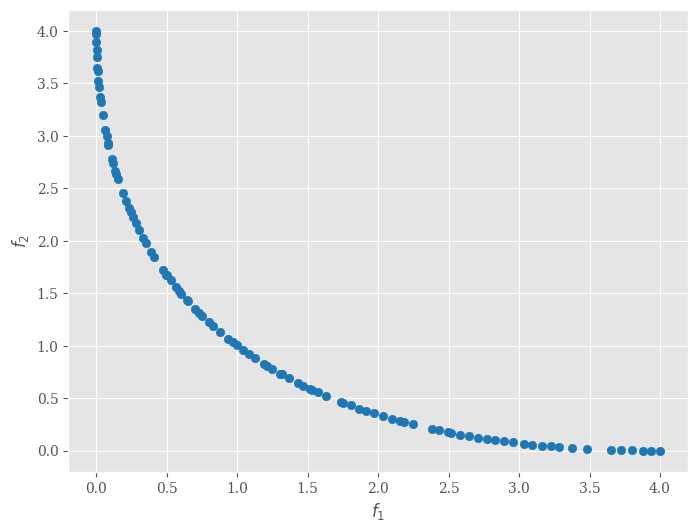

In [16]:
problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

Scatter().add(res.F).show()


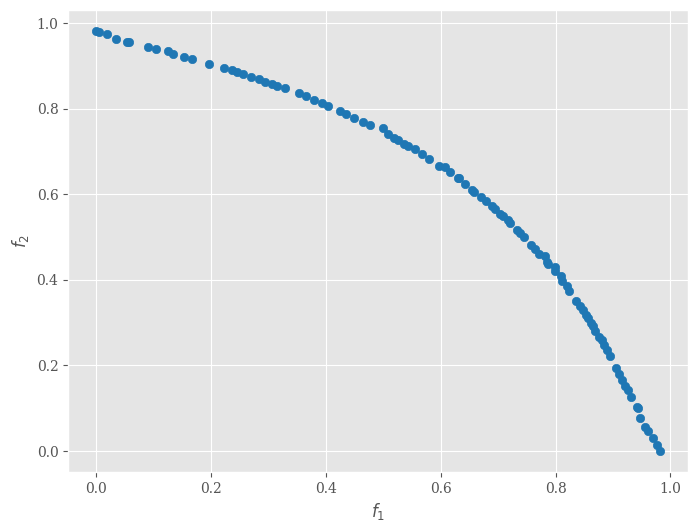

In [18]:
import numpy as np
from pymoo.core.problem import Problem
import math
class MyProblem(Problem):
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([-4,-4]),
                         xu=np.array([4,4]),
                        )
    def _evaluate(self, X, out, *args, **kwargs):
        x1 = X[:,0]
        x2 = X[:,1]
        sq2 = math.sqrt(2)
        f1 = 1-np.exp(-(x1-1/sq2)**2-(x2-1/sq2)**2)
        f2 = 1-np.exp(-(x1+1/sq2)**2-(x2+1/sq2)**2)
        # g1 = (X[:, 0]-0.1) / 0.1
        out["F"] = np.column_stack([f1, f2])
        # out["G"] = np.column_stack([g1, g2])
problem = MyProblem()
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)
Scatter().add(res.F).show()